In [44]:
# Importando as libs
from pysus.online_data.Infodengue import search_string, download
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [157]:
# Definindo datas para puxar os dados mais atualizados
data_atual = datetime.now()
semana_do_ano = data_atual.strftime("%U")
print(semana_do_ano)

14


In [46]:
# baixando os dados
df = download('dengue', 202301, f'2024{semana_do_ano}', 'Itu')

## Dicionário de Dados

- **data_ini_SE**: Primeiro dia da semana epidemiológica (Domingo)
- **SE**: Semana epidemiológica
- **casos_est**: Número estimado de casos por semana usando o modelo de nowcasting (nota: Os valores são atualizados retrospectivamente a cada semana)
- **cases_est_min** e **cases_est_max**: Intervalo de credibilidade de 95% do número estimado de casos
- **casos**: Número de casos notificados por semana (Os valores são atualizados retrospectivamente todas as semanas)
- **p_rt1**: Probabilidade de (Rt> 1). Para emitir o alerta laranja, usamos o critério p_rt1> 0,95 por 3 semanas ou mais.
- **p_inc100k**: Taxa de incidência estimada por 100.000
- **Localidade_id**: Divisão submunicipal (atualmente implementada apenas no Rio de Janeiro)
- **nivel**: Nível de alerta (1 = verde, 2 = amarelo, 3 = laranja, 4 = vermelho), mais detalhes, consulte [Saiba mais](link)
- **id**: Índice numérico
- **versao_modelo**: Versão do modelo (uso interno)
- **Rt**: Estimativa pontual do número reprodutivo de casos, ver [Saiba Mais](link)
- **pop**: População estimada (IBGE)
- **tempmin**: Média das temperaturas mínimas diárias ao longo da semana
- **tempmed**: Média das temperaturas diárias ao longo da semana
- **tempmax**: Média das temperaturas máximas diárias ao longo da semana
- **umidmin**: Média da umidade relativa mínima diária do ar ao longo da semana
- **umidmed**: Média da umidade relativa diária do ar ao longo da semana
- **umidmax**: Média da umidade relativa máxima diária do ar ao longo da semana
- **receptivo**: Indica receptividade climática, ou seja, condições para alta capacidade vetorial. 0 = desfavorável, 1 = favorável, 2 = favorável nesta semana e na semana passada, 3 = favorável por pelo menos três semanas (suficiente para completar um ciclo de transmissão)
- **transmissao**: Evidência de transmissão sustentada: 0 = nenhuma evidência, 1 = possível, 2 = provável, 3 = altamente provável
- **nivel_inc**: Incidência estimada abaixo do limiar pré-epidemia, 1 = acima do limiar pré-epidemia, mas abaixo do limiar epidêmico, 2 = acima do limiar epidêmico
- **notif_accum_year**: Número acumulado de casos no ano


In [47]:
df.head()

SE,202413,202412,202411,202410,202409,202408,202407,202406,202405,202404,...,202310,202309,202308,202307,202306,202305,202304,202303,202302,202301
data_iniSE,2024-03-24,2024-03-17,2024-03-10,2024-03-03,2024-02-25,2024-02-18,2024-02-11,2024-02-04,2024-01-28,2024-01-21,...,2023-03-05,2023-02-26,2023-02-19,2023-02-12,2023-02-05,2023-01-29,2023-01-22,2023-01-15,2023-01-08,2023-01-01
casos_est,488.5,869.0,1509.0,1718.0,1605.0,1179.0,1085.0,814.0,557.0,554.0,...,98.0,83.0,106.0,55.0,50.0,27.0,37.0,16.0,25.0,19.0
casos_est_min,121,835,1501,1712,1601,1178,1085,814,557,554,...,98,83,106,55,50,27,37,16,25,19
casos_est_max,1737,972,1522,1727,1613,1183,1088,816,559,554,...,98,83,106,55,50,27,37,16,25,19
casos,10,816,1498,1711,1601,1178,1085,814,557,554,...,98,83,106,55,50,27,37,16,25,19


In [48]:
# Transpondo os dados para um formato que permita análises
df = df.T.reset_index()
df.head()

,SE,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
0,202413,2024-03-24,488.5,121,1737,10,0.0,276.69528,0,4,...,87.810387,85.571838,20.714286,21.142857,NaN,NaN,NaN,NaN,NaN,16512
1,202412,2024-03-17,869.0,835,972,816,0.0,492.2174,0,4,...,78.627353,77.026936,24.982759,25.137931,NaN,NaN,NaN,NaN,NaN,16512
2,202411,2024-03-10,1509.0,1501,1522,1498,0.669374,854.72504,0,4,...,78.441948,76.119939,24.7,25.166667,NaN,NaN,NaN,NaN,NaN,16512
3,202410,2024-03-03,1718.0,1712,1727,1711,1.0,973.10645,0,4,...,82.990335,79.345452,23.625,24.230769,NaN,NaN,NaN,NaN,NaN,16512
4,202409,2024-02-25,1605.0,1601,1613,1601,1.0,909.1012,0,4,...,78.869823,77.195321,25.333333,25.733333,NaN,NaN,NaN,NaN,NaN,16512


In [49]:
# Criando colunas para auxiliar nas análises
df['SE'] = df['SE'].astype('str')
df['ano'] = df['SE'].str.extract('(\d{4})')
df['semana'] = df['SE'].str.slice(4).astype('int64')

In [50]:
# Classificando os dados pela semana
df = df.sort_values(by='SE')

# Como está a evolução da Dengue em Itu desde 2023?

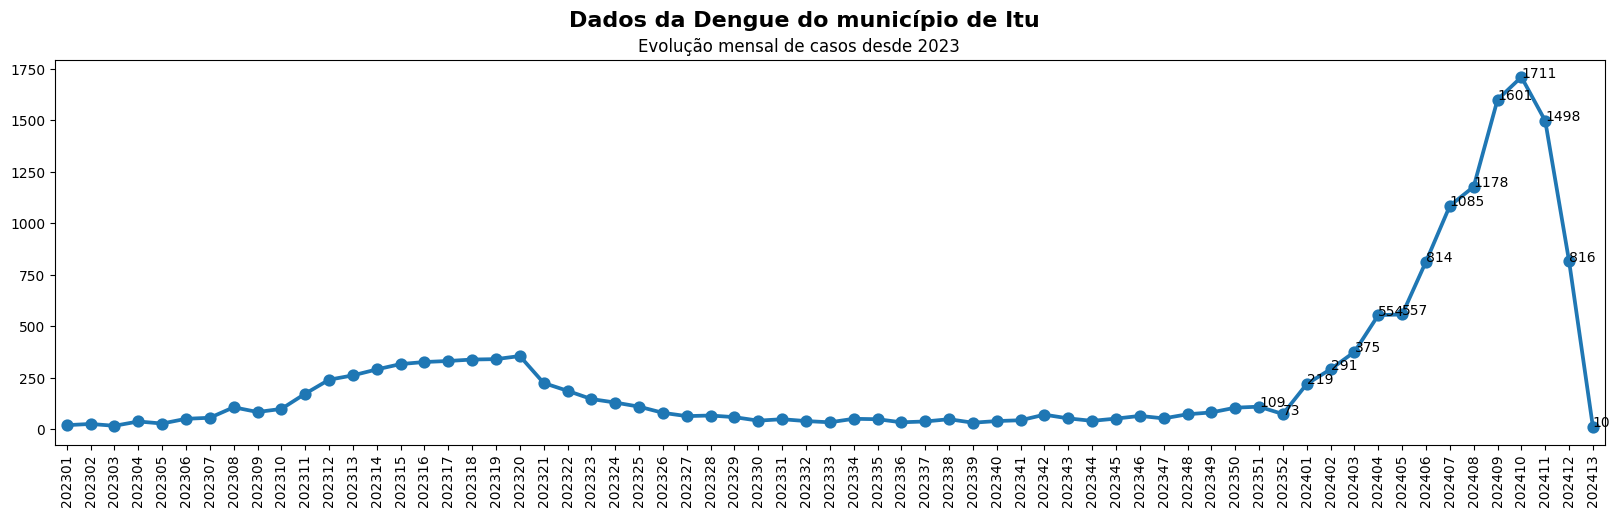

In [102]:
plt.figure(figsize = (20,5))
ax = sns.pointplot(data= df, x= 'SE', y = 'casos',estimator='sum')
for caso, semana in zip(df.casos[50:], df.SE[50:]):
    ax.text(s = caso, x = semana, y = caso)
plt.xticks(rotation = 90)
plt.suptitle('Dados da Dengue do município de Itu', fontsize = 16, weight = 'bold')
plt.title('Evolução mensal de casos desde 2023', x = 0.48)
plt.xlabel('')
plt.ylabel('')
plt.show()

# Quando comparamos todo o ano de 2023 contra todo o ano de 2024, qual o resultado?

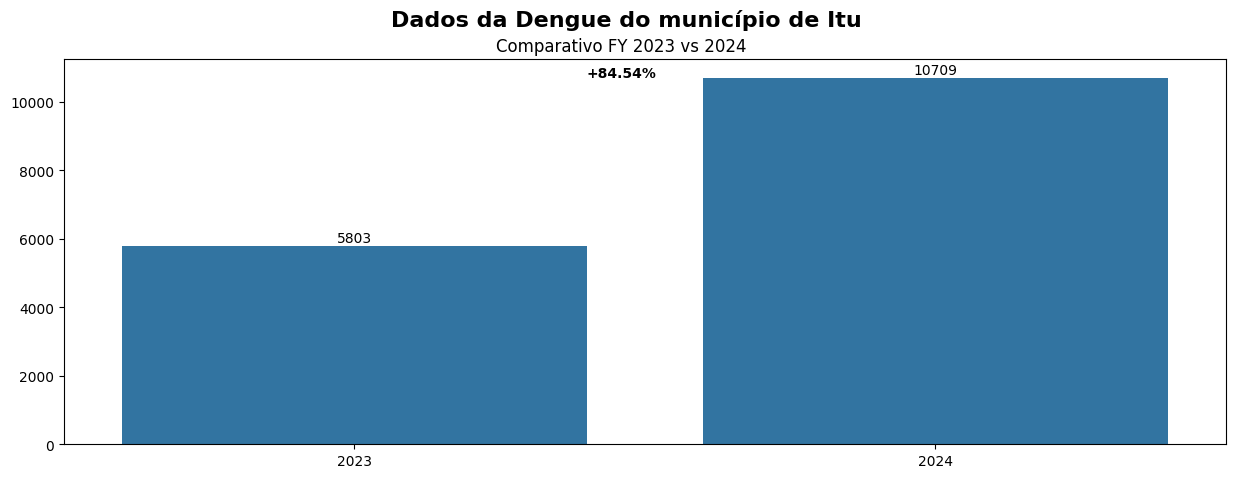

In [122]:
plt.figure(figsize = (15,5))
ax = sns.barplot(data = df, x = 'ano', y = 'casos', estimator='sum', errorbar=None)
ax.bar_label(ax.containers[0])
ax.text(s = f'+{((ax.containers[0][1].get_height() - ax.containers[0][0].get_height())/ ax.containers[0][0].get_height()) * 100 :.2f}%',
                        x = 0.4,
                        y = ax.containers[0][1].get_height(),
                        fontdict={'weight':'bold'})
plt.suptitle('Dados da Dengue do município de Itu', fontsize = 16, weight = 'bold')
plt.title('Comparativo FY 2023 vs 2024', x = 0.48)
plt.xlabel('')
plt.ylabel('')
plt.show()

# Qual o aumento percentual comparando o mesmo período de 2024 contra 2023?

In [123]:
df_comp = df[df['semana'].between(1, 13)].groupby(['ano','semana']).agg({'casos':'sum'}).reset_index()
df_comp_pct = df_comp.loc[0:12,].merge(df_comp.loc[13:,:], on = 'semana')
df_comp_pct['var_vs_ano_anterior'] = (df_comp_pct.casos_y - df_comp_pct.casos_x)/df_comp_pct.casos_x
df_comp_pct

,ano_x,semana,casos_x,ano_y,casos_y,var_vs_ano_anterior
0,2023,1,19,2024,219,10.526316
1,2023,2,25,2024,291,10.64
2,2023,3,16,2024,375,22.4375
3,2023,4,37,2024,554,13.972973
4,2023,5,27,2024,557,19.62963
5,2023,6,50,2024,814,15.28
6,2023,7,55,2024,1085,18.727273
7,2023,8,106,2024,1178,10.113208
8,2023,9,83,2024,1601,18.289157
9,2023,10,98,2024,1711,16.459184


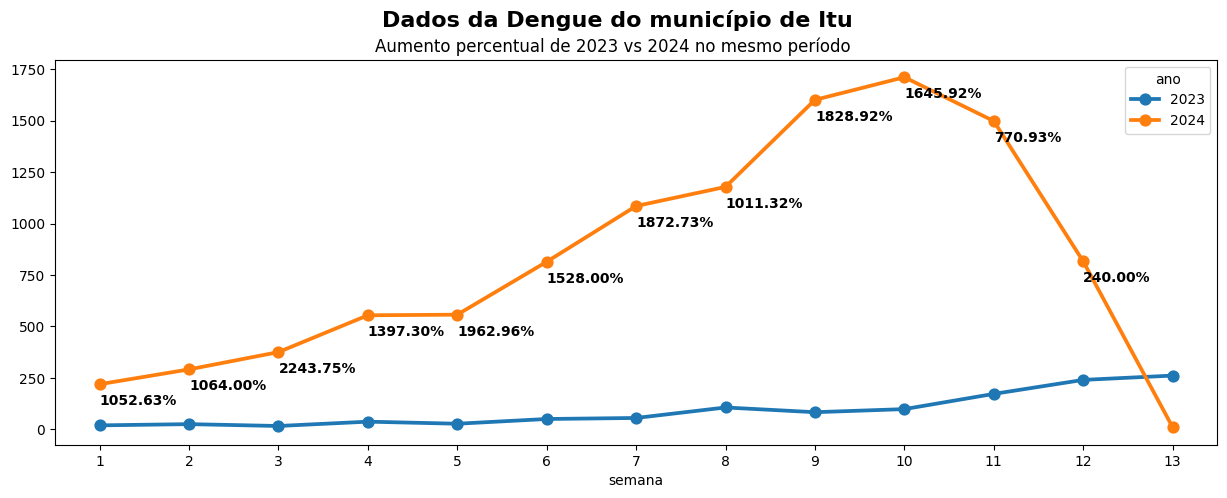

In [124]:
plt.figure(figsize = (15,5))
sns.pointplot(data = df_comp, x = 'semana', y = 'casos', hue = 'ano', estimator='sum')
for var, cx, cy in zip(df_comp_pct.var_vs_ano_anterior, df_comp_pct.semana,  df_comp_pct.casos_y):
    plt.annotate(text= f'{var * 100:.2f}%', xy=(cx-1, cy-100), weight='bold')
plt.suptitle('Dados da Dengue do município de Itu', fontsize = 16, weight = 'bold')
plt.title('Aumento percentual de 2023 vs 2024 no mesmo período', x = 0.48)
plt.ylabel('')
plt.show()

# Comparando todo o ano de 2024 contra 2023, quantas semanas ficamos em cada estado de alerta?

In [147]:
df_alerta = df.groupby(['ano','nivel']).agg({'semana':'count'}).reset_index()

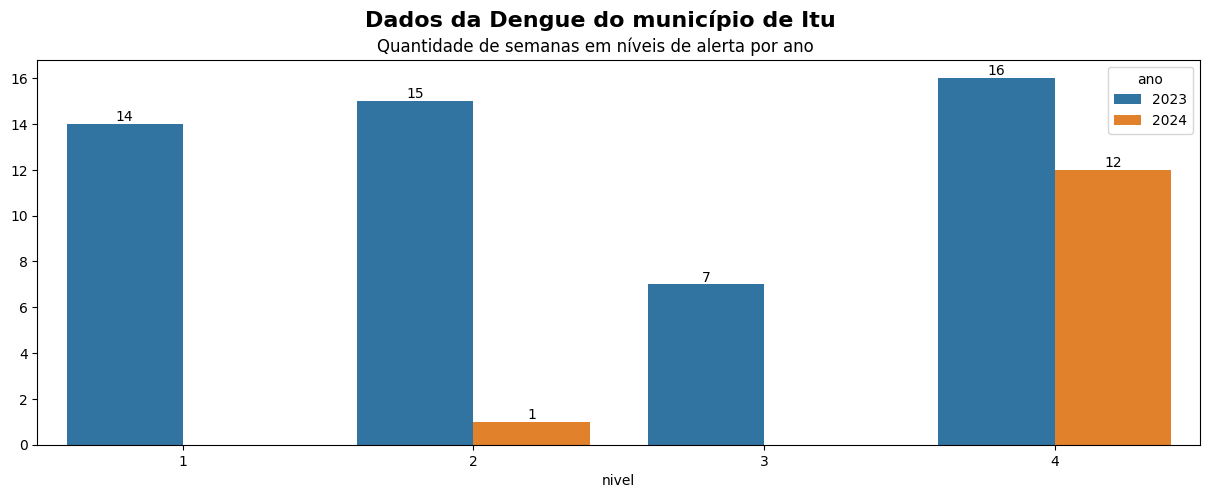

In [156]:
plt.figure(figsize = (15,5))
ax = sns.barplot(data = df_alerta, x = 'nivel', y = 'semana', hue = 'ano')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.suptitle('Dados da Dengue do município de Itu', fontsize = 16, weight = 'bold')
plt.title('Quantidade de semanas em níveis de alerta por ano', x = 0.48)
plt.ylabel('')
plt.show()